In [ ]:
  !pip install tensorflow


In [ ]:
from keras.datasets import imdb

In [ ]:
vocab_size=10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)

In [ ]:
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Training samples: {(x_train)}")
print(f"Test samples: {(x_test)}")
print("Sample review (tokenized):", x_train[0])
print("Sentiment label (1=positive, 0=negative):", y_train[0])


Training samples: 25000
Test samples: 25000
Training samples: [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 1

In [ ]:
#optional steps !!
word_index = imdb.get_word_index()
index_word = {index + 3: word for word, index in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"
decoded_review = ' '.join([index_word.get(i, '?') for i in x_train[0]])
print("Decoded Review:\n", decoded_review)


Decoded Review:
 <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen=200
x_train=pad_sequences(x_train,maxlen=maxlen,padding="post",truncating='post')
x_test=pad_sequences(x_test,maxlen=maxlen,padding="post",truncating='post')

In [ ]:
print("Padded review shape:", x_train.shape)


Padded review shape: (25000, 200)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
embedding_dim = 32
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.4988 - loss: 0.6978 - val_accuracy: 0.4960 - val_loss: 0.7211
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.5498 - loss: 0.6834 - val_accuracy: 0.5016 - val_loss: 0.6975
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6102 - loss: 0.6527 - val_accuracy: 0.5086 - val_loss: 0.7142
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6755 - loss: 0.5426 - val_accuracy: 0.5100 - val_loss: 0.8092
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7313 - loss: 0.4230 - val_accuracy: 0.5044 - val_loss: 0.9817
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7562 - loss: 0.3731 - val_accuracy: 0.5068 - val_loss: 1.0059
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7644 - loss: 0.3559 - val_accuracy: 0.5114 - val_loss: 1.0506
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7747 - loss: 0.3487 - 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy (RNN): {accuracy*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4950 - loss: 1.2013
Test Accuracy (RNN): 49.14%


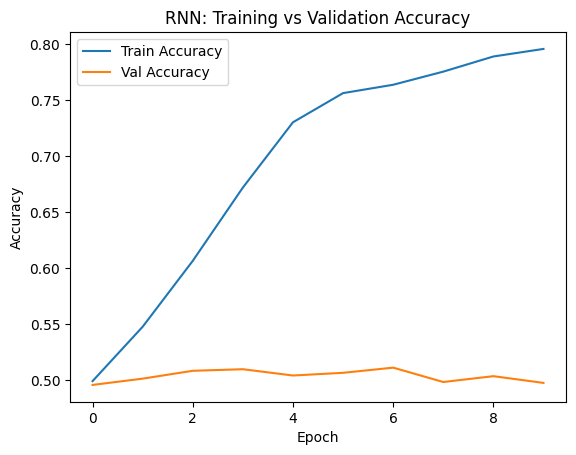

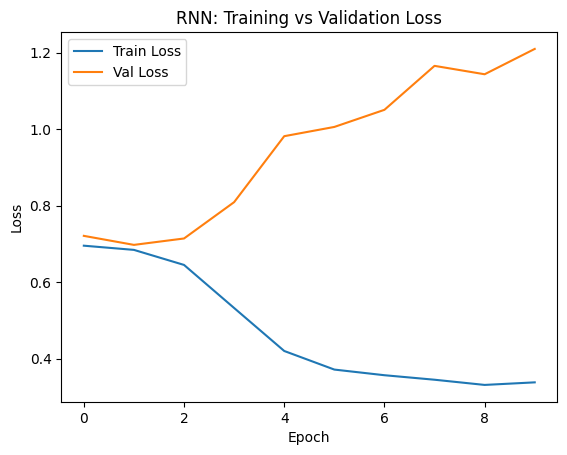

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("RNN: Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("RNN: Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


USING LSTM

In [ ]:
from keras.layers import LSTM

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - accuracy: 0.5085 - loss: 0.6927 - val_accuracy: 0.5304 - val_loss: 0.6907
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.5724 - loss: 0.6799 - val_accuracy: 0.5162 - val_loss: 0.6920
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.6056 - loss: 0.6393 - val_accuracy: 0.5662 - val_loss: 0.6908
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.6326 - loss: 0.6311 - val_accuracy: 0.6140 - val_loss: 0.6166
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.6717 - loss: 0.5654 - val_accuracy: 0.7038 - val_loss: 0.5766
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.7157 - loss: 0.5757 - val_accuracy: 0.7962 - val_loss: 0.4855
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.8261 - loss: 0.4297 - val_accuracy: 0.7938 - val_loss: 0.4913
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.8566 - loss: 0.3730 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy (RNN): {accuracy*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7594 - loss: 0.5532
Test Accuracy (RNN): 75.85%


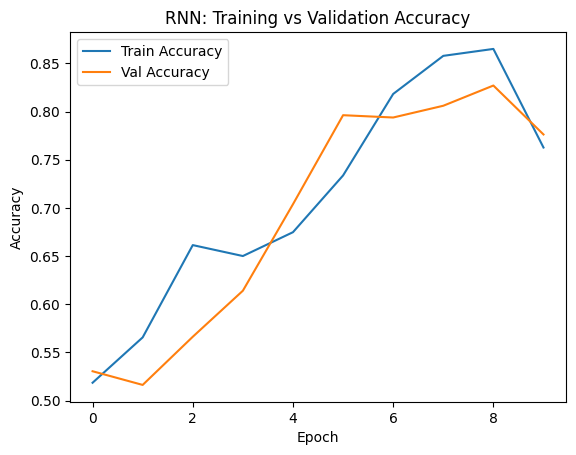

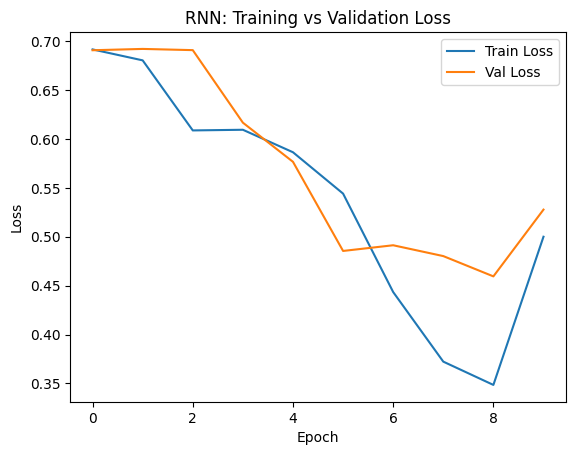

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("RNN: Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("RNN: Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
from keras.preprocessing.sequence import pad_sequences

def encode_review(text):
    tokens = text.lower().split()
    encoded = [1]
    for word in tokens:
        index = word_index.get(word, 2)
        if index < vocab_size:
            encoded.append(index)
    return pad_sequences([encoded], maxlen=maxlen, padding='post')


In [ ]:
text="I absolutely loved the storyline and the acting!"
sample = encode_review(text)
prediction = model.predict(sample)[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
print("Review Text:", text)
print(f"Prediction Score: {prediction:.4f}")
print("Sentiment:", "🟢 Positive" if prediction > 0.5 else "🔴 Negative")

Review Text: I absolutely loved the storyline and the acting!
Prediction Score: 0.7188
Sentiment: 🟢 Positive
